# Lending Club loan Data Analysis


In [103]:
# Import our libraries we are going to use for our data analysis.


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os


# Other Libraries
import time


% matplotlib inline



In [104]:
loan = pd.read_csv(os.getcwd()+'\Desktop\CIS_3120\LoanStats3d.csv', low_memory=False)

In [105]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,24700.0,24700.0,24700.0,36 months,11.99%,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000.0,35000.0,35000.0,60 months,12.88%,794.21,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000.0,20000.0,20000.0,60 months,13.99%,465.27,C,C4,...,NaN,NaN,Cash,Y,Nov-17,COMPLETE,Sep-17,9915.0,55.0,1.0
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,12.88%,672.73,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,14025.0,14025.0,14025.0,60 months,18.49%,359.90,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421099 entries, 0 to 421098
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 465.8+ MB


In [107]:
# Create another set of feutures

In [108]:
loan.drop(['id','member_id'], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,24700.0,24700.0,24700.0,36 months,11.99%,820.28,C,C1,Engineer,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,35000.0,35000.0,35000.0,60 months,12.88%,794.21,C,C2,Lieutenant,7 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,20000.0,20000.0,60 months,13.99%,465.27,C,C4,Facilities Coordinator,10+ years,...,NaN,NaN,Cash,Y,Nov-17,COMPLETE,Sep-17,9915.0,55.00,1.0
3,20000.0,20000.0,20000.0,36 months,12.88%,672.73,C,C2,President,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,14025.0,14025.0,14025.0,60 months,18.49%,359.90,D,D5,accts payable,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,16000.0,16000.0,16000.0,60 months,8.49%,328.19,B,B1,Supervisor,5 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,17475.0,17475.0,17475.0,36 months,13.99%,597.17,C,C4,Software Testing Analyst,2 years,...,NaN,NaN,Cash,Y,Feb-19,COMPLETE,Jan-18,4382.0,44.99,12.0
7,33600.0,33600.0,33600.0,36 months,10.78%,1096.53,B,B4,Aviation Safety Inspector,8 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,10400.0,10400.0,10400.0,60 months,22.45%,289.91,F,F1,Contract Specialist,3 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,20000.0,20000.0,20000.0,60 months,10.78%,432.66,B,B4,truck driver,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [110]:
loan.dropna().info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 0.0+ bytes


# data cleaning

In [111]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


missing_values_table(loan)

Your selected dataframe has 145 columns.
There are 145 columns that have missing values.


,Missing Values,% of Total Values,type
url,421099,100.0,float64
sec_app_mths_since_last_major_derog,421099,100.0,float64
member_id,421099,100.0,float64
revol_bal_joint,421099,100.0,float64
sec_app_earliest_cr_line,421099,100.0,float64
sec_app_inq_last_6mths,421099,100.0,float64
sec_app_mort_acc,421099,100.0,float64
sec_app_open_acc,421099,100.0,float64
sec_app_revol_util,421099,100.0,float64
sec_app_open_act_il,421099,100.0,float64


In [112]:
#From this table, we can see that there is a huge gap between features missing some data (~15% and below) and those missing lots of data (up to 100%!). I chose 50% as the cutoff.
missing_frac = loan.isnull().mean()
drop_list = sorted(missing_frac[missing_frac > 0.50].index)


In [113]:
print(drop_list)

len(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_ac

57

In [114]:


def drop_cols(cols):
    loan.drop(labels=cols, axis=1, inplace=True)




drop_cols(drop_list)

In [115]:
drop_list = ['acc_now_delinq','policy_code','acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d','last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

In [116]:
drop_cols(drop_list)

In [117]:
print(sorted(loan.columns))


['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']


In [118]:
len(loan.columns)

31

In [119]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
0,24700.0,36 months,11.99%,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,0.0,21470.0,19.20%,38.0,w,Individual,113.0,192.0,4.0,0.0
1,35000.0,60 months,12.88%,794.21,C,C2,Lieutenant,7 years,MORTGAGE,106000.0,...,0.0,39055.0,72.10%,27.0,w,Individual,135.0,164.0,4.0,0.0
2,20000.0,60 months,13.99%,465.27,C,C4,Facilities Coordinator,10+ years,OWN,70000.0,...,0.0,31200.0,42%,35.0,w,Individual,46.0,174.0,0.0,0.0
3,20000.0,36 months,12.88%,672.73,C,C2,President,10+ years,MORTGAGE,145000.0,...,0.0,22551.0,80.20%,21.0,w,Individual,79.0,142.0,5.0,0.0
4,14025.0,60 months,18.49%,359.90,D,D5,accts payable,10+ years,MORTGAGE,39000.0,...,0.0,15646.0,74.90%,21.0,w,Individual,138.0,172.0,3.0,0.0


In [120]:
loan['revol_util'] = loan['revol_util'].fillna('0.0%').astype(str).apply(lambda x: x.split('%')[0]).astype(float)
loan['int_rate'] = loan['int_rate'].fillna('0.0%').astype(str).apply(lambda x: x.split('%')[0]).astype(float)
loan.emp_length.value_counts()

10+ years    141521
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emp_length, dtype: int64

In [121]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [122]:
loan = loan.replace({"emp_length": emp_length_dict })

In [123]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,...,0.0,21470.0,19.2,38.0,w,Individual,113.0,192.0,4.0,0.0
1,35000.0,60 months,12.88,794.21,C,C2,Lieutenant,7.0,MORTGAGE,106000.0,...,0.0,39055.0,72.1,27.0,w,Individual,135.0,164.0,4.0,0.0
2,20000.0,60 months,13.99,465.27,C,C4,Facilities Coordinator,10.0,OWN,70000.0,...,0.0,31200.0,42.0,35.0,w,Individual,46.0,174.0,0.0,0.0
3,20000.0,36 months,12.88,672.73,C,C2,President,10.0,MORTGAGE,145000.0,...,0.0,22551.0,80.2,21.0,w,Individual,79.0,142.0,5.0,0.0
4,14025.0,60 months,18.49,359.90,D,D5,accts payable,10.0,MORTGAGE,39000.0,...,0.0,15646.0,74.9,21.0,w,Individual,138.0,172.0,3.0,0.0


Text(0.5,0,'Annual Income')

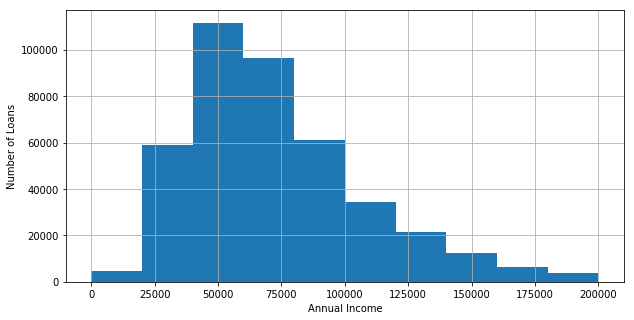

In [124]:
#limit the data with annual income $200000
loan = loan[loan['annual_inc']<200000]
loan.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')



In [125]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,74030.0,14.972235,4.349043,5.32,12.29,14.65,17.86,28.99
Current,43937.0,14.330954,3.908938,5.32,11.53,13.99,17.14,28.99
Fully Paid,289980.0,11.754783,4.045788,5.32,8.18,11.53,13.99,28.99
In Grace Period,661.0,15.774508,4.029097,6.00,12.99,15.41,18.25,28.49
Late (16-30 days),223.0,15.561076,3.859453,7.89,12.69,14.65,18.25,27.88
Late (31-120 days),1542.0,15.492711,4.144650,5.32,12.69,15.41,18.25,28.99


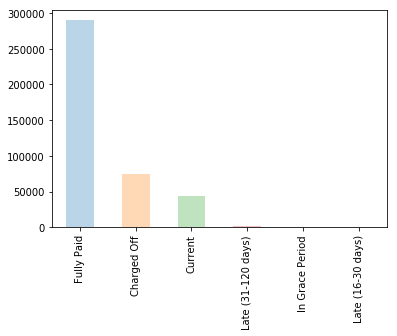

In [126]:
loan.loan_status.value_counts().plot(kind='bar',alpha=.30)

In [127]:
#Determing the loan status

loan['loan_status'].value_counts(dropna=False)

Fully Paid            289980
Charged Off            74030
Current                43937
Late (31-120 days)      1542
In Grace Period          661
Late (16-30 days)        223
Name: loan_status, dtype: int64

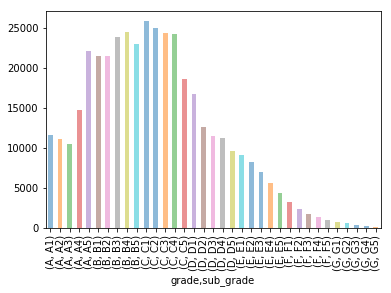

In [128]:
#grouping the loans by the grade


loan.groupby(['grade','sub_grade']).size().plot(kind='bar',alpha=.50)


Text(0.5,0,'Loan Amount')

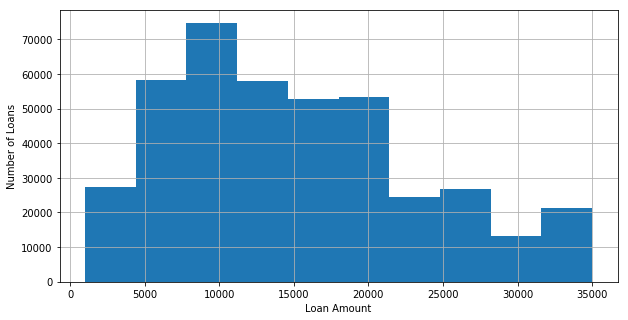

In [129]:
loan['loan_amnt'].hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Loan Amount')


In [130]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


loan['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
loan['loan_condition'] = loan['loan_status'].apply(loan_condition)



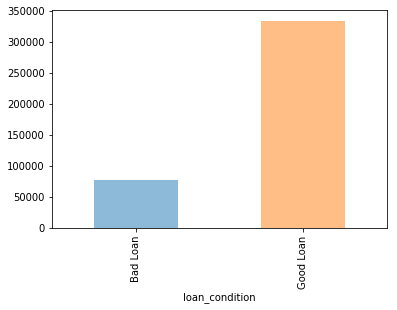

In [131]:
loan.groupby(['loan_condition']).size().plot(kind='bar',alpha=.50)

In [132]:

## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [133]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax


# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()
    
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (loan.loc[loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)
    

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


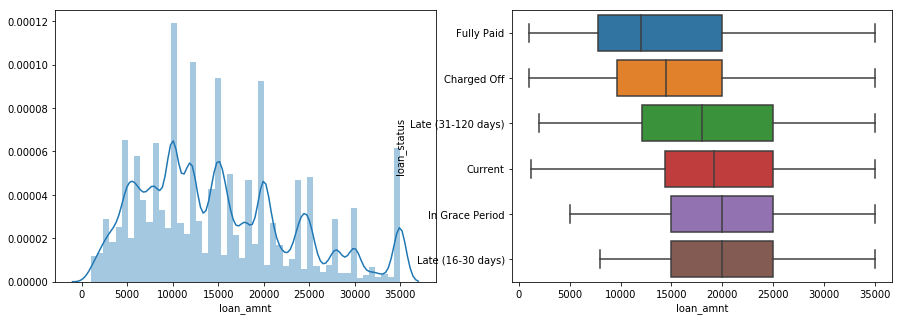

In [134]:

plot_distribution(loan, 'loan_amnt')

###### Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
Funding amounts see a spike around each 5000 boundary.
Charged off loans are shifted towards higher average loan amount request.

In [135]:
#Create Derived categorical variable
#loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
 #                                     [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [136]:
#plotLoanStatus(loan, 'loan_amnt_bin')

###### Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

###### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset

In [137]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

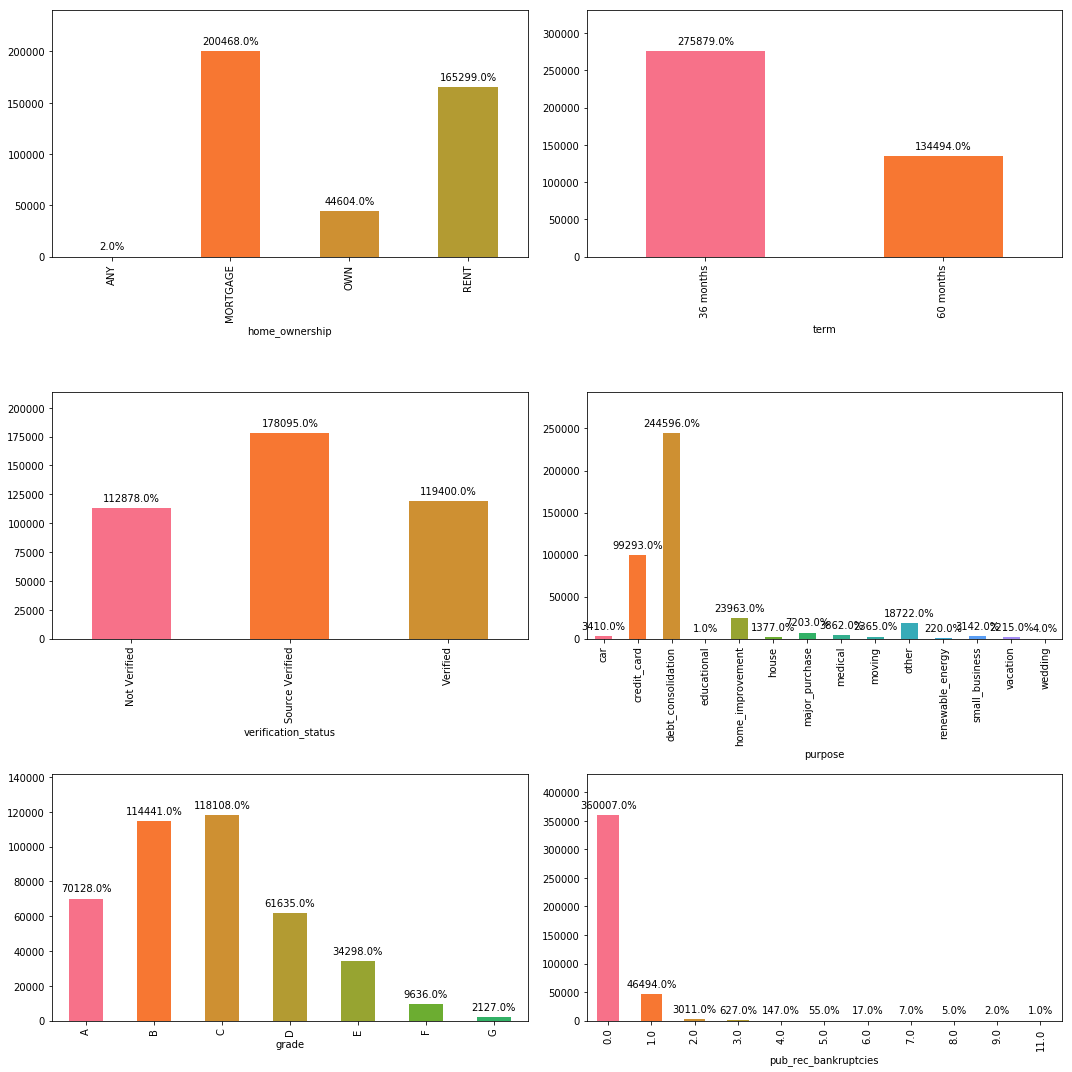

In [138]:
plt.figure(figsize=(15,15))

categoricalBarPlots(loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

###### Obervation

Most loans are for 36 month term
Very few loans are extended to people with prior record of bankruptcy
debt_consolidation is by far the largest 'purpose' for seeking a loan
Most approved loans are high grade


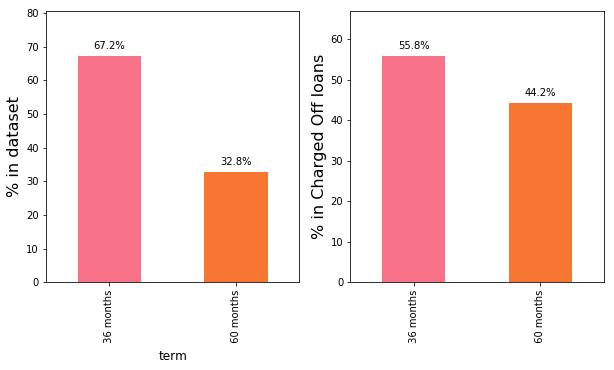

In [139]:
plt.figure(figsize=(10,5))
plot_percentages(loan, 'term')


###### Observation:

Around 67% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
Among Charged Off loans, percentage of term 60 months rises to 45%.

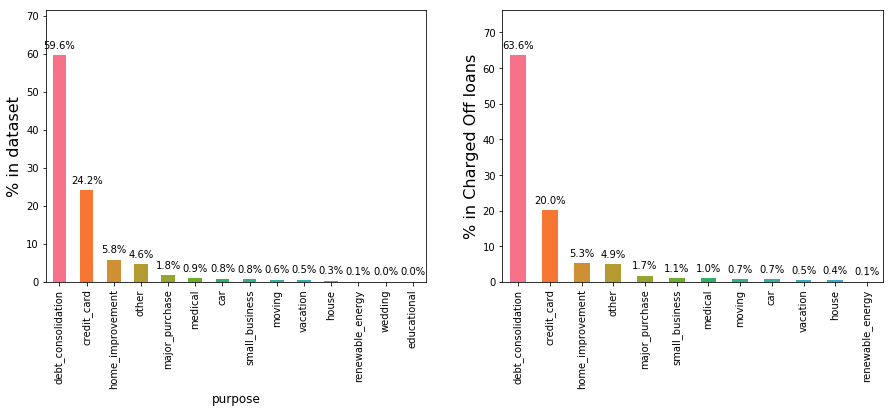

In [140]:
plt.figure(figsize=(15,5))
plot_percentages(loan, 'purpose')

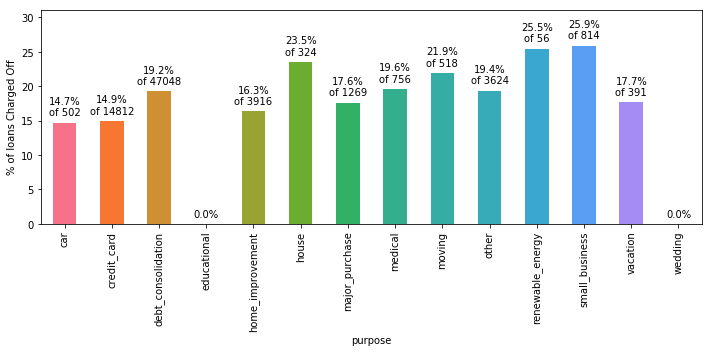

In [141]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'purpose')

###### Observation:

Approximately ~49% of the loans are issued for the purpose of dept consolidation.
17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

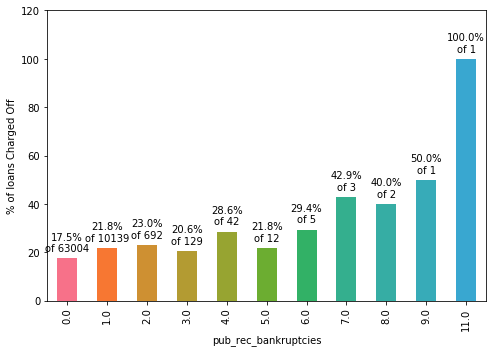

In [142]:
plt.figure(figsize=(7,5))
plotLoanStatus(loan, 'pub_rec_bankruptcies')

In [143]:
loan.int_rate.describe()

count    410373.000000
mean         12.633610
std           4.313354
min           5.320000
25%           9.170000
50%          12.290000
75%          15.610000
max          28.990000
Name: int_rate, dtype: float64

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

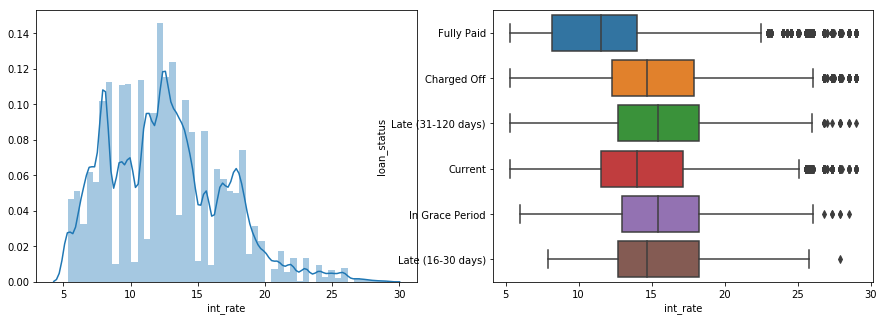

In [144]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'int_rate')

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

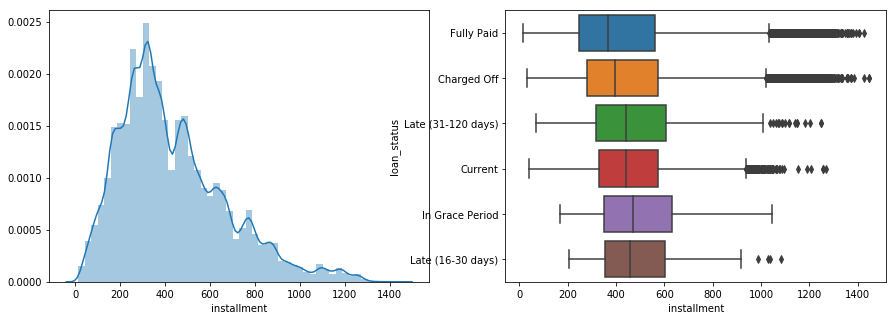

In [145]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'installment')

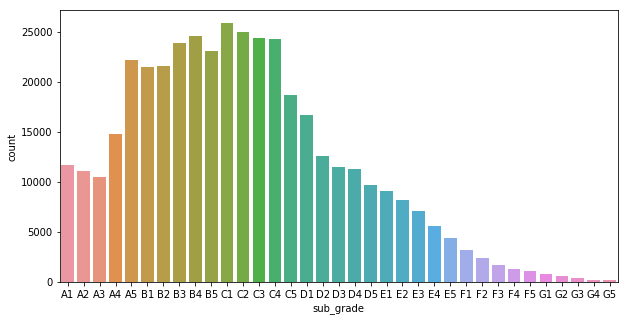

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.show()

###### Observation:

Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
Grade D, E, F, G loans are less safe.
Lending Clubs grading system is working well.

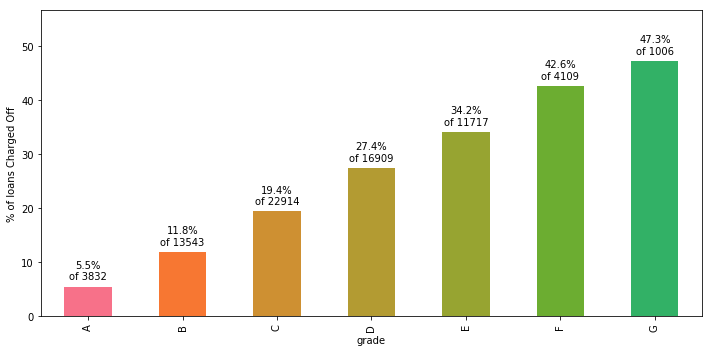

In [147]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'grade')

###### Observation:

Nearly 30% of all loans in Grades F and G see a default.
Grade E onwards are risky, and less numerous.

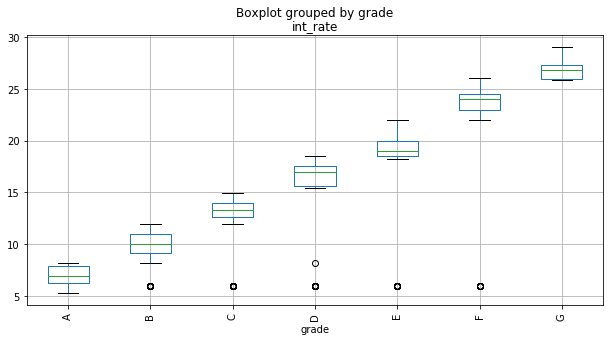

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

###### Observation:

Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

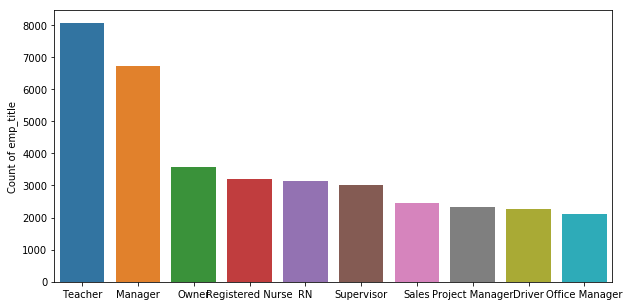

In [149]:
top10_emp_title = loan.emp_title.value_counts(normalize=False).head(10)
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

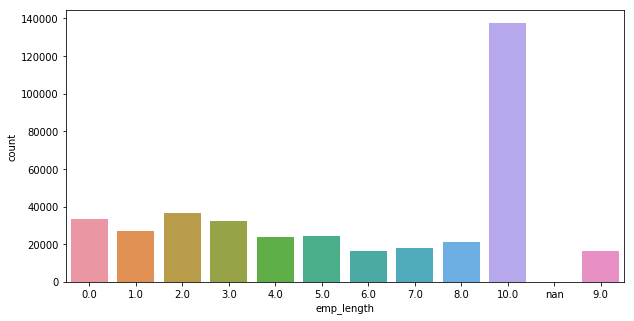

In [150]:
loan.emp_length.value_counts(normalize=True)
plt.figure(figsize=(10,5))
sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
plt.show()


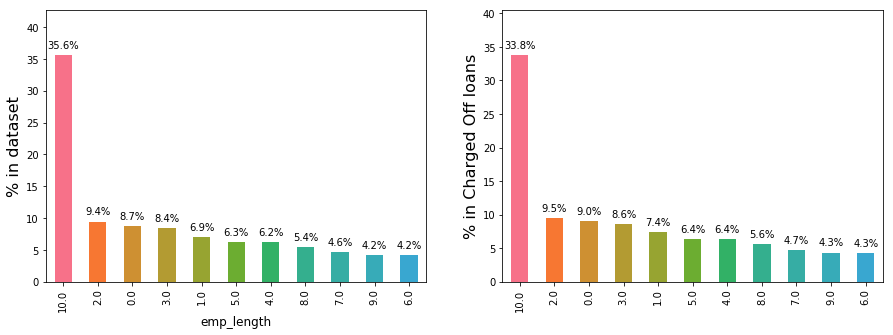

In [151]:
plt.figure(figsize=(15, 5))
plot_percentages(loan, 'emp_length')

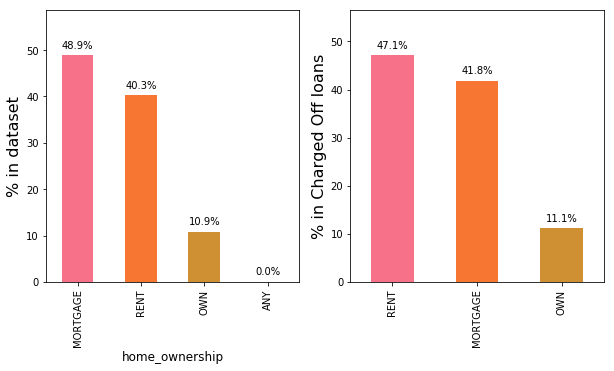

In [152]:
plt.figure(figsize=(10,5))
plot_percentages(loan, 'home_ownership')

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


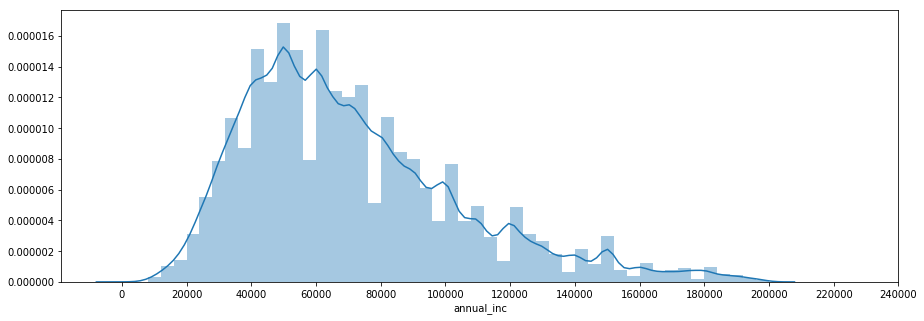

In [153]:
plt.figure(figsize=(15, 5))
sns.distplot(loan['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [154]:
loan.addr_state.value_counts(normalize=True).head(10)

CA    0.137039
TX    0.081882
NY    0.079581
FL    0.069719
IL    0.040025
PA    0.035636
NJ    0.035463
OH    0.034598
GA    0.033550
NC    0.028625
Name: addr_state, dtype: float64

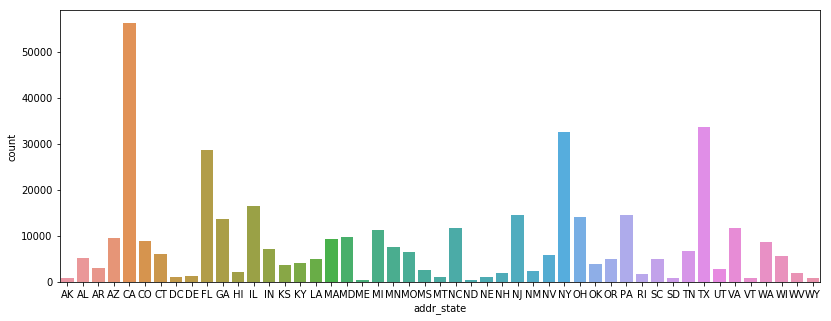

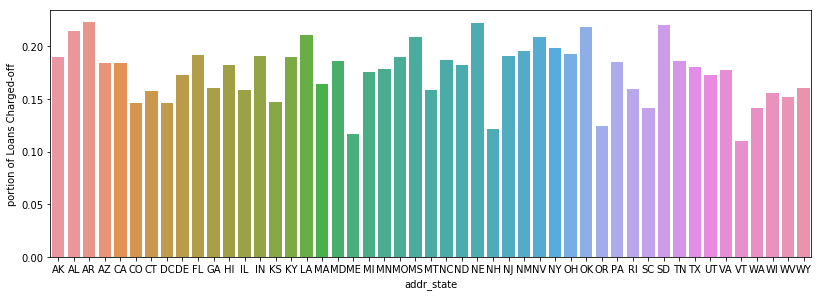

In [155]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()

In [156]:
#plt.figure(figsize=(10,5))

#plot_distribution(loan, 'dti')

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


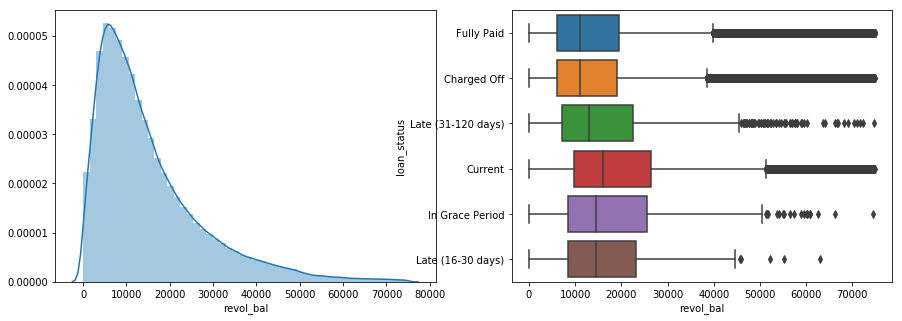

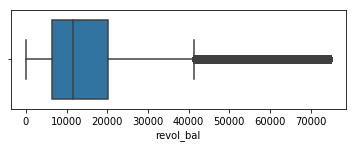

In [157]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan = loan[np.abs(loan.revol_bal-loan.revol_bal.mean()) <= (3*loan.revol_bal.std())]
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan['revol_bal'], y=loan['loan_status'], data=loan)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan['revol_bal'], data=loan)
plt.show()

Text(0.5,1,'Type of Loans by Sub-Grade')

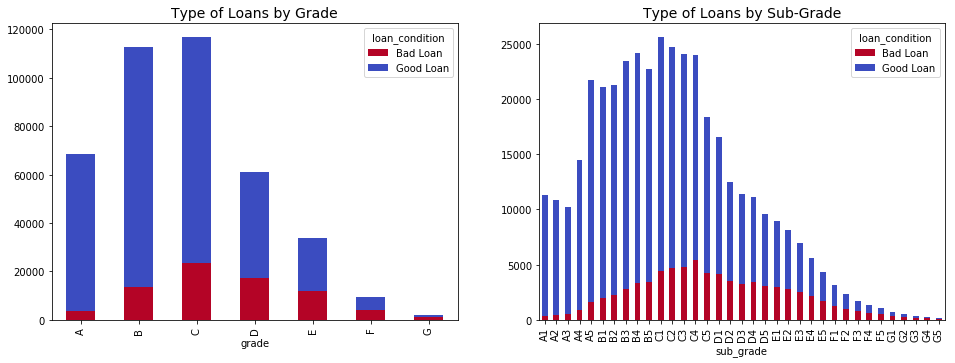

In [158]:
#Compare bad loans and good loans by their grade and subgrade


fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)


cmap = plt.cm.coolwarm_r

loans_by_region = loan.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = loan.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)



In [159]:
#dti
#Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

loan['dti'].describe()


count    404593.000000
mean         19.276772
std           8.858110
min           0.000000
25%          12.760000
50%          18.740000
75%          25.440000
max         999.000000
Name: dti, dtype: float64

C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'DTI by loan status')

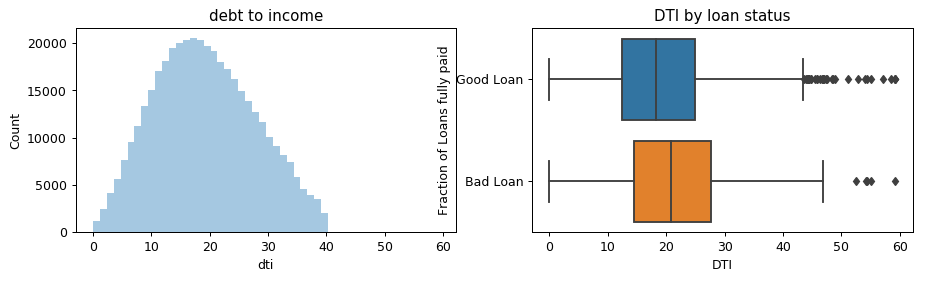

In [160]:
#The values of -1 or 999 are probably outliers. Let's look at its histogram .
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
sns.distplot(loan.loc[loan['dti'].notnull() & (loan['dti'] < 60), 'dti'], kde=False, ax=ax1)
ax1.set_xlabel('dti')
ax1.set_ylabel('Count')
ax1.set_title('debt to income')
sns.boxplot(x=loan.loc[loan['dti'].notnull() & (loan['dti'] < 60), 'dti'], y='loan_condition', data=loan, ax=ax2)
ax2.set_xlabel('DTI')
ax2.set_ylabel('Fraction of Loans fully paid')
ax2.set_title('Fully paid rate by debt to income')
ax2.set_title('DTI by loan status')

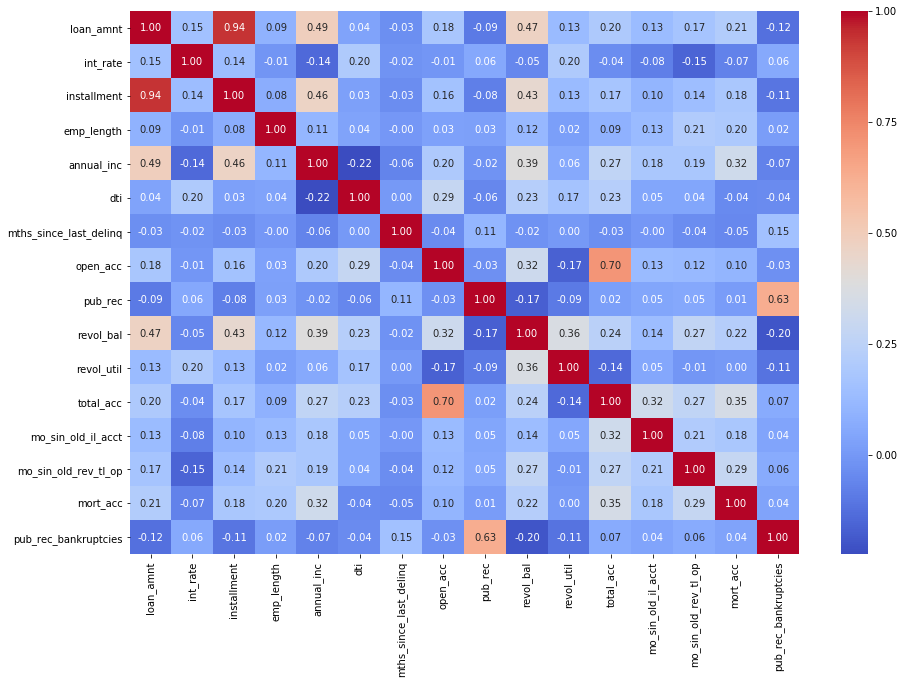

In [161]:
list_float = loan.select_dtypes(exclude=['object']).columns
list_float
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(loan[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

# Feature Engineering and Neural Network:

There are features that are redundant (as show in the beginning of this kernel in the distribution subplots) having no effect towards the "loan_condition" label so we need to drop these features.

Use StrattifiedShuffleSplit to have approximately the same ratio of bad loans compared to good loans in both training and testing data. Remember that over 92% of the loans are considered good loans so it is important to have this same ration across training and testing sets.
Scale numeric features and encode categorical features from our dataframe.
Run our Neural Network containing the number of inputs, 2 hidden layers (first: 15 nodes, second: 5 nodes) and the number of outputs which is equivalent to 2.


In [162]:
complete_df = loan.copy()

complete_df.head(30)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition
0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,...,21470.0,19.2,38.0,w,Individual,113.0,192.0,4.0,0.0,Good Loan
1,35000.0,60 months,12.88,794.21,C,C2,Lieutenant,7.0,MORTGAGE,106000.0,...,39055.0,72.1,27.0,w,Individual,135.0,164.0,4.0,0.0,Bad Loan
2,20000.0,60 months,13.99,465.27,C,C4,Facilities Coordinator,10.0,OWN,70000.0,...,31200.0,42.0,35.0,w,Individual,46.0,174.0,0.0,0.0,Bad Loan
3,20000.0,36 months,12.88,672.73,C,C2,President,10.0,MORTGAGE,145000.0,...,22551.0,80.2,21.0,w,Individual,79.0,142.0,5.0,0.0,Bad Loan
4,14025.0,60 months,18.49,359.90,D,D5,accts payable,10.0,MORTGAGE,39000.0,...,15646.0,74.9,21.0,w,Individual,138.0,172.0,3.0,0.0,Good Loan
5,16000.0,60 months,8.49,328.19,B,B1,Supervisor,5.0,MORTGAGE,62000.0,...,15763.0,51.2,24.0,w,Individual,165.0,159.0,3.0,0.0,Good Loan
6,17475.0,36 months,13.99,597.17,C,C4,Software Testing Analyst,2.0,RENT,39750.0,...,10987.0,52.3,13.0,w,Individual,106.0,163.0,0.0,0.0,Bad Loan
7,33600.0,36 months,10.78,1096.53,B,B4,Aviation Safety Inspector,8.0,RENT,104000.0,...,28475.0,51.8,31.0,w,Individual,156.0,181.0,1.0,0.0,Good Loan
8,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,...,21929.0,64.5,35.0,w,Individual,128.0,210.0,6.0,0.0,Good Loan
9,20000.0,60 months,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.0,...,7869.0,56.2,18.0,w,Joint App,125.0,184.0,5.0,0.0,Good Loan


In [163]:
print(sorted(complete_df.columns))

['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_condition', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']


In [164]:
#copy dataframe


# Handling Missing Numeric Values

# Transform Missing Values for numeric dataframe
# Nevertheless check what these variables mean tomorrow in the morning.
for col in ('addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_condition', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code' ):
    complete_df[col] = complete_df[col].fillna(0)
    

In [165]:
complete_df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_condition'],
      dtype='object')

In [166]:
# Let's transform the column loan_condition into integrers.

lst = [complete_df]
complete_df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[complete_df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[complete_df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
complete_df['loan_condition_int'] = complete_df['loan_condition_int'].astype(int)

In [167]:
len(complete_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
complete_df['loan_condition_int'].value_counts()/len(complete_df['loan_condition_int']) * 100

0    81.28054
1    18.71946
Name: loan_condition_int, dtype: float64

In [168]:
complete_df.isnull().sum().max()


23520

In [169]:
# Let's make a copy of the dataframe to avoid confusion.

from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [170]:
complete_df.dtypes

loan_amnt                 float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                float64
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
earliest_cr_line           object
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status        object
application_type           object
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mort_acc      

In [171]:
for column in complete_df.columns:
    if complete_df[column].dtype==object:
        if complete_df[column][0][-1]=='%':
            complete_df[column] = complete_df[column].fillna('0.0%')
            complete_df[column] = complete_df[column].fillna('0.0%')
            if complete_df[column].dtype==str:
                complete_df[column] = complete_df[column].apply(lambda x: x.split('%')[0])
                complete_df[column] = complete_df[column].apply(lambda x: x.split('%')[0])
           
        else:
            
            complete_df[column] = labelencoder_X.fit_transform(complete_df[column].fillna('0').astype(str))
           # complete_df[column] = labelencoder_X.transform(complete_df[column].fillna('0').astype(str))
             

In [172]:
complete_df.dtypes

loan_amnt                 float64
term                        int32
int_rate                  float64
installment               float64
grade                       int32
sub_grade                   int32
emp_title                   int32
emp_length                float64
home_ownership              int32
annual_inc                float64
verification_status         int32
issue_d                     int32
loan_status                 int32
purpose                     int32
title                       int32
zip_code                    int32
addr_state                  int32
dti                       float64
earliest_cr_line            int32
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status         int32
application_type            int32
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mort_acc      

In [173]:
complete_df.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition,loan_condition_int
0,24700.0,0,11.99,820.28,2,10,31794,10.0,1,65000.0,...,19.2,38.0,1,0,113.0,192.0,4.0,0.0,1,0
1,35000.0,1,12.88,794.21,2,11,49373,7.0,1,106000.0,...,72.1,27.0,1,0,135.0,164.0,4.0,0.0,0,1
2,20000.0,1,13.99,465.27,2,13,34103,10.0,2,70000.0,...,42.0,35.0,1,0,46.0,174.0,0.0,0.0,0,1
3,20000.0,0,12.88,672.73,2,11,65348,10.0,1,145000.0,...,80.2,21.0,1,0,79.0,142.0,5.0,0.0,0,1
4,14025.0,1,18.49,359.90,3,19,98975,10.0,1,39000.0,...,74.9,21.0,1,0,138.0,172.0,3.0,0.0,1,0
5,16000.0,1,8.49,328.19,1,5,88831,5.0,1,62000.0,...,51.2,24.0,1,0,165.0,159.0,3.0,0.0,1,0
6,17475.0,0,13.99,597.17,2,13,83357,2.0,3,39750.0,...,52.3,13.0,1,0,106.0,163.0,0.0,0.0,0,1
7,33600.0,0,10.78,1096.53,1,8,8934,8.0,3,104000.0,...,51.8,31.0,1,0,156.0,181.0,1.0,0.0,1,0
8,10400.0,1,22.45,289.91,5,25,20018,3.0,1,104433.0,...,64.5,35.0,1,0,128.0,210.0,6.0,0.0,1,0
9,20000.0,1,10.78,432.66,1,8,116087,10.0,1,63000.0,...,56.2,18.0,1,1,125.0,184.0,5.0,0.0,1,0


In [174]:
complete_df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition,loan_condition_int
0,24700.0,0,11.99,820.28,2,10,31794,10.0,1,65000.0,...,19.2,38.0,1,0,113.0,192.0,4.0,0.0,1,0
1,35000.0,1,12.88,794.21,2,11,49373,7.0,1,106000.0,...,72.1,27.0,1,0,135.0,164.0,4.0,0.0,0,1
2,20000.0,1,13.99,465.27,2,13,34103,10.0,2,70000.0,...,42.0,35.0,1,0,46.0,174.0,0.0,0.0,0,1
3,20000.0,0,12.88,672.73,2,11,65348,10.0,1,145000.0,...,80.2,21.0,1,0,79.0,142.0,5.0,0.0,0,1
4,14025.0,1,18.49,359.90,3,19,98975,10.0,1,39000.0,...,74.9,21.0,1,0,138.0,172.0,3.0,0.0,1,0


In [175]:
complete_df['revol_util'] = complete_df['revol_util'].fillna('0.0%').astype(str).apply(lambda x: x.split('%')[0]).astype(float)
complete_df['int_rate'] = complete_df['int_rate'].fillna('0.0%').astype(str).apply(lambda x: x.split('%')[0]).astype(float)
#complete_df['emp_length'] = labelencoder_X.fit_transform(complete_df['emp_length'].astype(str))
#complete_df =complete_df.drop(['loan_amnt_bin'], axis = 1 ,inplace=True)

In [176]:
complete_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition,loan_condition_int
0,24700.0,0,11.99,820.28,2,10,31794,10.0,1,65000.0,...,19.2,38.0,1,0,113.0,192.0,4.0,0.0,1,0
1,35000.0,1,12.88,794.21,2,11,49373,7.0,1,106000.0,...,72.1,27.0,1,0,135.0,164.0,4.0,0.0,0,1
2,20000.0,1,13.99,465.27,2,13,34103,10.0,2,70000.0,...,42.0,35.0,1,0,46.0,174.0,0.0,0.0,0,1
3,20000.0,0,12.88,672.73,2,11,65348,10.0,1,145000.0,...,80.2,21.0,1,0,79.0,142.0,5.0,0.0,0,1
4,14025.0,1,18.49,359.90,3,19,98975,10.0,1,39000.0,...,74.9,21.0,1,0,138.0,172.0,3.0,0.0,1,0


In [177]:
complete_df.isnull().sum().max()

0

In [178]:
len(complete_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
complete_df['loan_condition_int'].value_counts()/len(complete_df['loan_condition_int']) * 100

0    81.28054
1    18.71946
Name: loan_condition_int, dtype: float64

In [179]:
#The purpose of the code below is to have the same ratio across our training and test sets.
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(complete_df, complete_df["loan_condition_int"]):
    stratified_train = complete_df.loc[train_set]
    stratified_test = complete_df.loc[test_set]
    
print('Train set ratio \n', stratified_train["loan_condition_int"].value_counts()/len(loan))
print('Test set ratio \n', stratified_test["loan_condition_int"].value_counts()/len(loan))

C:\Users\flore\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
C:\Users\flore\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Train set ratio 
 0.0    0.624820
1.0    0.143991
Name: loan_condition_int, dtype: float64
Test set ratio 
 0.0    0.156552
1.0    0.035547
Name: loan_condition_int, dtype: float64


In [180]:
stratified_train.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition,loan_condition_int
95249,18000.0,0.0,7.89,563.15,0.0,4.0,358.0,0.0,1.0,62000.0,...,70.7,16.0,1.0,0.0,157.0,140.0,4.0,0.0,1.0,0.0
117049,7000.0,0.0,9.17,223.16,1.0,6.0,58996.0,1.0,3.0,35000.0,...,25.0,11.0,0.0,0.0,101.0,104.0,0.0,1.0,1.0,0.0
25673,28000.0,1.0,8.38,572.85,1.0,5.0,77110.0,10.0,1.0,99000.0,...,64.6,14.0,1.0,0.0,124.0,182.0,0.0,0.0,1.0,0.0
368151,7000.0,0.0,11.53,230.94,1.0,9.0,67944.0,10.0,3.0,61000.0,...,36.7,21.0,0.0,0.0,182.0,330.0,0.0,0.0,1.0,0.0
395997,4600.0,0.0,14.31,157.92,2.0,13.0,59838.0,3.0,3.0,50000.0,...,20.4,15.0,0.0,0.0,41.0,34.0,0.0,0.0,1.0,0.0
33138,10000.0,0.0,6.89,308.27,0.0,2.0,2132.0,4.0,2.0,56000.0,...,45.5,7.0,1.0,0.0,92.0,110.0,0.0,0.0,1.0,0.0
156159,4000.0,0.0,13.33,135.42,2.0,12.0,112727.0,10.0,2.0,61000.0,...,37.1,28.0,0.0,0.0,156.0,271.0,4.0,0.0,1.0,0.0
154862,24000.0,1.0,13.33,550.14,2.0,12.0,29016.0,5.0,3.0,48000.0,...,97.9,21.0,1.0,0.0,72.0,130.0,0.0,0.0,1.0,0.0
342653,25000.0,1.0,13.33,573.06,2.0,12.0,358.0,0.0,2.0,66696.0,...,45.2,25.0,0.0,0.0,84.0,253.0,3.0,0.0,1.0,0.0
170460,18400.0,0.0,13.33,622.90,2.0,12.0,64603.0,0.0,3.0,40000.0,...,28.9,30.0,0.0,0.0,112.0,336.0,4.0,0.0,1.0,0.0


In [181]:
train_df = stratified_train
test_df = stratified_test


# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)


# Train set (Normal training dataset)
X_train = train_df.drop('loan_condition_int', axis=1)
y_train = train_df['loan_condition_int']


# Test Dataset
X_test = test_df.drop('loan_condition_int', axis=1)
y_test = test_df['loan_condition_int']

In [182]:
X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition
0,16000.0,0.0,16.99,570.37,3.0,17.0,30727.0,5.0,2.0,45000.0,...,3317.0,52.7,51.0,1.0,0.0,111.0,187.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8400.0,0.0,5.32,252.97,0.0,0.0,95204.0,10.0,1.0,100000.0,...,50442.0,46.4,33.0,0.0,0.0,111.0,309.0,3.0,0.0,1.0
4,10950.0,0.0,12.29,365.22,2.0,10.0,65348.0,8.0,2.0,45000.0,...,25136.0,45.5,22.0,1.0,0.0,60.0,186.0,1.0,0.0,1.0


In [183]:
X_train.isnull().sum().max()


12619

In [184]:
X_test.dtypes

loan_amnt                 float64
term                      float64
int_rate                  float64
installment               float64
grade                     float64
sub_grade                 float64
emp_title                 float64
emp_length                float64
home_ownership            float64
annual_inc                float64
verification_status       float64
issue_d                   float64
loan_status               float64
purpose                   float64
title                     float64
zip_code                  float64
addr_state                float64
dti                       float64
earliest_cr_line          float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status       float64
application_type          float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mort_acc      

In [185]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
SimpleImputer(copy=True, fill_value=None, missing_values= np.nan,strategy='mean', verbose=0)

print(imp_mean.transform(X_train))

[[3.500e+04 0.000e+00 1.884e+01 ... 5.000e+00 0.000e+00 1.000e+00]
 [1.070e+04 0.000e+00 6.920e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.400e+04 0.000e+00 8.380e+00 ... 3.000e+00 0.000e+00 1.000e+00]
 ...
 [1.000e+04 0.000e+00 1.099e+01 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.000e+04 0.000e+00 1.825e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [5.000e+03 0.000e+00 1.099e+01 ... 1.000e+00 1.000e+00 0.000e+00]]


In [186]:
X_train

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,loan_condition
0,35000.0,0.0,18.84,1280.14,4.0,21.0,58996.0,10.0,1.0,92000.0,...,6365.0,44.2,49.0,0.0,0.0,151.0,183.0,5.0,0.0,1.0
1,10700.0,0.0,6.92,330.00,0.0,3.0,26437.0,2.0,2.0,45000.0,...,11132.0,14.5,36.0,1.0,0.0,128.0,211.0,0.0,0.0,1.0
2,14000.0,0.0,8.38,441.17,1.0,5.0,60673.0,6.0,2.0,100000.0,...,12807.0,79.1,30.0,1.0,0.0,144.0,133.0,3.0,0.0,1.0
3,12000.0,0.0,12.69,402.54,2.0,11.0,104881.0,0.0,1.0,72000.0,...,11546.0,68.7,23.0,1.0,0.0,172.0,120.0,2.0,0.0,0.0
4,12000.0,0.0,11.53,395.89,1.0,9.0,17342.0,10.0,3.0,59000.0,...,8785.0,67.1,12.0,1.0,0.0,101.0,229.0,0.0,0.0,1.0
5,10000.0,0.0,12.05,332.39,2.0,10.0,84555.0,7.0,1.0,78000.0,...,2127.0,88.6,19.0,1.0,0.0,121.0,104.0,3.0,0.0,1.0
6,20000.0,1.0,21.67,548.64,4.0,24.0,69454.0,3.0,1.0,114000.0,...,10459.0,34.9,52.0,1.0,0.0,126.0,152.0,0.0,0.0,1.0
7,15000.0,0.0,6.49,459.67,0.0,1.0,67995.0,3.0,1.0,35000.0,...,15211.0,54.9,19.0,0.0,0.0,105.0,232.0,1.0,0.0,1.0
8,7000.0,0.0,10.99,229.14,1.0,8.0,34977.0,2.0,3.0,38000.0,...,11212.0,55.0,10.0,0.0,0.0,38.0,126.0,0.0,0.0,1.0
9,5400.0,0.0,9.99,174.22,1.0,7.0,40588.0,8.0,3.0,19000.0,...,4047.0,46.0,16.0,1.0,0.0,133.0,162.0,0.0,0.0,1.0


In [187]:
y_train.head()


0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: loan_condition_int, dtype: float64

In [188]:
from sklearn.impute import SimpleImputer

imp_mean_t = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean_t.fit(X_test)
SimpleImputer(copy=True, fill_value=None, missing_values= np.nan,strategy='mean', verbose=0)

print(imp_mean.transform(X_test))

[[1.60000000e+04 0.00000000e+00 1.69900000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.48752903e+04 3.27065457e-01 1.26299255e+01 ... 1.61712805e+00
  1.36769145e-01 8.12709568e-01]
 [1.48752903e+04 3.27065457e-01 1.26299255e+01 ... 1.61712805e+00
  1.36769145e-01 8.12709568e-01]
 ...
 [3.00000000e+03 0.00000000e+00 1.12200000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+04 1.00000000e+00 1.22900000e+01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.20000000e+03 0.00000000e+00 7.26000000e+00 ... 2.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [189]:
y_train = y_train.fillna(0).astype(float)
#X_test = y_test.fillna(0).astype(float)

In [190]:
labelencoder_Y = LabelEncoder()
y_train = labelencoder_Y.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [191]:
y_test

array([ 0, 26,  4, ...,  0,  0,  0], dtype=int64)

In [192]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)



In [193]:
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)
y_train=np.nan_to_num(y_train)
y_test=np.nan_to_num(y_test)

In [194]:
np.isfinite(X_test).all()

True

In [195]:
y_train.dtype


dtype('int64')

In [196]:
from xgboost import XGBClassifier
classifier_1 = XGBClassifier()
classifier_1.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [197]:
from sklearn.metrics import accuracy_score
y_pred_1 = classifier_1.predict(X_test)
print(accuracy_score(y_test, y_pred_1))

0.960491355553084


In [198]:
from sklearn.linear_model import LogisticRegression
classifier_4 = LogisticRegression(penalty = 'l1', random_state = 0)
classifier_4.fit(X_train,y_train)
y_pred_4 = classifier_4.predict(X_test)
print(accuracy_score(y_test, y_pred_4))
#print(y_pred_4)

C:\Users\flore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9604789975160346


In [199]:
#y_pred_4

In [200]:
classifier_4.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', classifier_4.coef_)
print('Intercept: \n', classifier_4.intercept_)

Coefficient: 
 [[ 2.06774374e-05 -8.34503725e-02  6.37885553e-02 -2.77182883e-06
   3.85719809e-01  9.09084871e-03  1.31440395e-05  4.35386041e-02
   1.07590276e+00  1.39596728e-05  3.16824188e-01  9.48161428e-02
  -5.74794984e-01  9.29388549e-02  7.93374597e-02  1.64829914e-03
   3.02690009e-02  1.40330680e-02  1.62185471e-03  6.68036471e-03
   4.00543416e-02  7.66508168e-02 -1.03767124e-05  2.41776370e-02
   3.01498426e-02  8.46738240e-01  0.00000000e+00  1.14530501e-02
   4.55027640e-03  6.36977615e-02  1.34458646e-01 -2.00307848e+01]]
Intercept: 
 [-5.88836753]


In [201]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [202]:
model.fit(X_train, y_train)
model.score(X_train, y_train)
#Predict Output
predicted = model.predict(X_test)

In [203]:
print(accuracy_score(y_test, predicted))

0.960491355553084


In [204]:
print(predicted)

[0 0 0 ... 0 0 0]
